# Finding Differences between two images

In [7]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


## Function for calcualting similarity

In [8]:

def calculate_similarity(image1, image2):
    # Convert images to grayscale
    gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

    # Compute absolute difference between the two images
    abs_diff = cv2.absdiff(gray1, gray2)

    # Threshold the absolute difference image
    _, threshold = cv2.threshold(abs_diff, 30, 255, cv2.THRESH_BINARY)

    # Apply morphological operations to enhance the differences
    kernel = np.ones((3, 3), np.uint8)
    threshold = cv2.dilate(threshold, kernel, iterations=2)
    threshold = cv2.erode(threshold, kernel, iterations=2)

    # Find contours around the differences
    contours, _ = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw bounding boxes around the contours on the second image
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(image2, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Calculate similarity score
    similarity_score = np.mean(abs_diff) / 255.0

    return image1, image2, similarity_score



# Calling the function and making bounding boxes

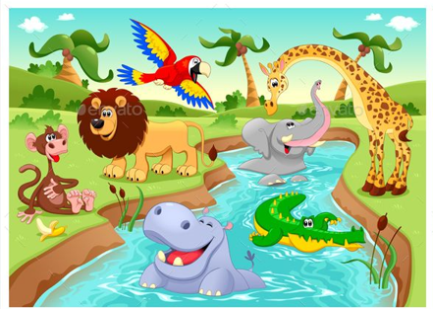

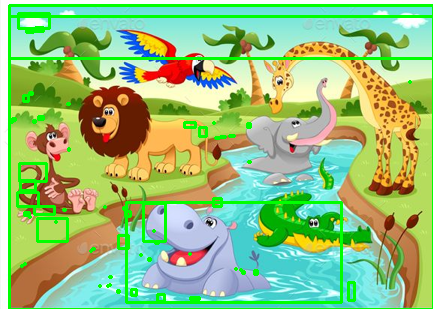

Similarity Score: 0.08360643509255389


In [9]:
# Load the two input images
image1 = cv2.imread('/content/Screenshot 2024-04-14 234244.png')
image2 = cv2.imread('/content/Screenshot 2024-04-14 234308.png')

# Ensure images have the same dimensions
image1 = cv2.resize(image1, (image2.shape[1], image2.shape[0]))

# Calculate similarity and draw bounding boxes
result_image1, result_image2, similarity_score = calculate_similarity(image1, image2)

# Display the first image without bounding boxes
cv2_imshow(result_image1)

# Display the second image with bounding boxes
cv2_imshow(result_image2)

# Print the similarity score
print("Similarity Score:", similarity_score)


In [ ]:
Thank You For this opportunity